In [56]:
import os
print(os.getcwd())

C:\JNB


In [57]:
pip install faker

Note: you may need to restart the kernel to use updated packages.


In [58]:
"""

fake data generator
"""


import random

from faker import Faker
fake = Faker()

n = 10
def generate_product(n):

    products = []
    categories = ["Tea", "Coffee"]
    teas = ["Matcha", "Jasmine", "Hojicha", "Earl Grey", "Green"]
    coffees = ["Espresso", "Latte", "Cappuccino", "Americano", "Mocha"]
   
    
    
    for item in range(1,n+1):
        product_id = item
        category = random.choice(categories)
        if category == "Tea":
            choice = random.choice(teas)
            
            name = choice
        else:
            choice = random.choice(coffees)
            
            name = choice
        price = round(random.uniform(5.0, 25.0), 2)

        products.append((product_id,name, category, price))
    
    return products

        
            

        
    
        



def generate_inventory(n):

    inventory = []
    for product in range(1,n+1):
        product_id = product
        stock_level = random.randint(10,100)
        reorder_level = random.randint(5, stock_level//2)
        inventory.append((product_id, stock_level, reorder_level))
    return inventory



products = generate_product(n)  # returns list of tuples: (product_id, name, category, price)
product_ids = [p[0] for p in products]

def generate_sales(n_sales, product_ids):
    sales = []
    used_ids =[]
    

    for _ in range (n_sales):
        while True:
            sale_id = random.randint(1,1000)
            if sale_id not in used_ids:
                used_ids.append(sale_id)
                break

        product_id = random.choice(product_ids)
        quantity = random.randint(1,10)

        date = fake.date_between(start_date= '-1y', end_date='today')
        sales.append((sale_id, product_id, quantity, str(date)))
    return sales





test1 = generate_product(n)

aaa= generate_inventory(n)

bbb= generate_sales(50, product_ids)

print("products:")
print(test1)
print("\n\n")

print('inventory:')
print(aaa)

print("\n\n")
print('sales:')
print(bbb)


products:
[(1, 'Cappuccino', 'Coffee', 17.34), (2, 'Mocha', 'Coffee', 11.18), (3, 'Cappuccino', 'Coffee', 23.44), (4, 'Earl Grey', 'Tea', 23.66), (5, 'Cappuccino', 'Coffee', 7.97), (6, 'Jasmine', 'Tea', 21.32), (7, 'Americano', 'Coffee', 24.91), (8, 'Espresso', 'Coffee', 23.69), (9, 'Matcha', 'Tea', 15.67), (10, 'Latte', 'Coffee', 9.45)]



inventory:
[(1, 53, 14), (2, 65, 17), (3, 52, 15), (4, 13, 5), (5, 84, 10), (6, 80, 23), (7, 58, 29), (8, 47, 17), (9, 25, 6), (10, 85, 19)]



sales:
[(317, 3, 6, '2025-08-19'), (187, 10, 5, '2024-11-10'), (653, 5, 5, '2025-08-01'), (886, 2, 4, '2025-03-27'), (490, 4, 4, '2025-01-13'), (978, 10, 4, '2025-08-12'), (848, 10, 1, '2024-11-06'), (412, 10, 7, '2024-10-08'), (7, 1, 8, '2025-04-22'), (404, 5, 1, '2025-02-15'), (727, 8, 8, '2025-05-03'), (940, 5, 3, '2025-04-14'), (288, 3, 8, '2024-11-02'), (910, 4, 1, '2025-08-01'), (76, 2, 2, '2024-10-24'), (871, 10, 10, '2024-11-16'), (443, 2, 6, '2025-07-17'), (557, 2, 9, '2025-05-02'), (572, 5, 6, '202

Low stock items:
             name  stock_level  reorder_level
0  Matcha Powder            10             20
1  Matcha Powder            10             20
2  Matcha Powder            10             20
3  Matcha Powder            10             20
4  Matcha Powder            10             20
5  Matcha Powder            10             20

Total sales by product:
                   name  total_sold
0             Americano         368
1                 Green         308
2                Matcha         290
3             Earl Grey         258
4            Cappuccino         237
5               Hojicha         212
6              Espresso         196
7                 Latte         176
8                 Mocha         146
9               Jasmine         109
10    Jasmine Green Tea         105
11       Matcha Powder          102
12  Hojicha Roasted Tea          60


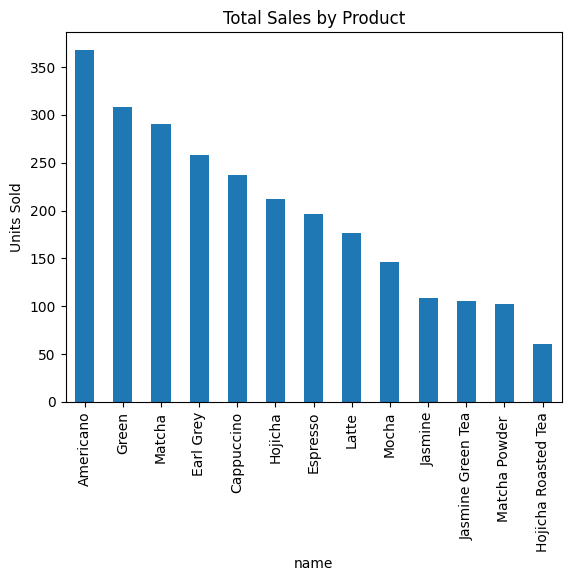


Total inventory by product:
                   name  total_stock
0             Americano         6639
1            Cappuccino         6835
2             Earl Grey         8010
3              Espresso         5278
4                 Green         6572
5               Hojicha         5139
6   Hojicha Roasted Tea          786
7               Jasmine         6315
8     Jasmine Green Tea         1366
9                 Latte         5419
10               Matcha         9825
11       Matcha Powder           739
12                Mocha         6199


In [59]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#connect to SQL
conn = sqlite3.connect("inventory.db")  # creates the DB file
cursor = conn.cursor() # so we can use SQL commands

# make tables

cursor.execute("""
CREATE TABLE IF NOT EXISTS products ( 
    product_id INTEGER PRIMARY KEY,
    name TEXT,
    category TEXT,
    price REAL
)
""")
# the (Create table if not exists) creates products if it doesn't exist. 
# each product gets product id
# rest are columns for product info, next to the column in CAPS is the type, int = int, real= float
# primary key is column that equally identifies each row, every table needs one. 
#A foreign key is a column in one table that links to the primary key of another table.

cursor.execute("""
CREATE TABLE IF NOT EXISTS inventory (
    product_id INTEGER,
    stock_level INTEGER,
    reorder_level INTEGER,
    FOREIGN KEY(product_id) REFERENCES products(product_id)
)
""")
#product_id in inventory is a foreign key pointing to products.product_id.

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    sale_id INTEGER PRIMARY KEY,
    product_id INTEGER,
    quantity INTEGER,
    date TEXT,
    FOREIGN KEY(product_id) REFERENCES products(product_id)
)
""")

conn.commit() #tells SQLite to save all changes.



# fake data 
n = random.randint(5,200)

products = generate_product(n)
# tuples representing product rows. 

inventory = generate_inventory(n)
product_ids = [p[0] for p in products]
sales = generate_sales(50, product_ids)





cursor.executemany("INSERT OR IGNORE INTO products VALUES (?, ?, ?, ?);", products) # inserts multiple rows at once. 
# OR IGNORE = skips insertion if row already exists (preventing duplcates)
#excecutemany --> Runs the same SQL command for each tuple in the list.
# "?" acts as a placeholder for each value in the row. 
cursor.executemany("INSERT OR IGNORE INTO inventory VALUES (?, ?, ?);", inventory)
cursor.executemany("INSERT OR IGNORE INTO sales VALUES (?, ?, ?, ?);", sales)
conn.commit()



cursor.execute("""
UPDATE products
SET name = REPLACE(name, '100g', '')
WHERE name LIKE '%100g%';
""")
conn.commit()



# low stock alert feature. 

low_stock_query = """
SELECT p.name, i.stock_level, i.reorder_level 
FROM inventory i
JOIN products p ON i.product_id = p.product_id
WHERE i.stock_level < i.reorder_level;
"""
# p = product alias, i = inventory, s = sales
# SELET name of product form products, stock level from inventory, reorder level from inventory, ALL from table inventory i
#joins tables for result = products p table, ON -> only product_id from inventory matches product_id from products table
# WHERE --> if stocklevel is less then reorder level. 

low_stock = pd.read_sql_query(low_stock_query, conn) # pandas read sql query
print("Low stock items:")
print(low_stock)


#Sales summary & visualization

sales_summary_query = """
SELECT p.name, SUM(s.quantity) AS total_sold
FROM sales s
JOIN products p ON s.product_id = p.product_id
GROUP BY p.name
ORDER BY total_sold DESC;
"""
# selects the name of the product from the products, SUM --> adds all quantity sold from sales of that product, naming new column total_sold
#Joins products on the products table if sales product id matches products product id. 
# GROUP BY --> groups all sales rows by product name before applying SUM, without GROUP BY, SUM would sum all sales across all products. 
#ORDER BY --> sorts by highest to lowest. 


sales_summary = pd.read_sql_query(sales_summary_query, conn)# pandas read sql query
print("\nTotal sales by product:")
print(sales_summary)

# Bar chart
sales_summary.plot(kind="bar", x="name", y="total_sold", legend=False)
plt.title("Total Sales by Product")
plt.ylabel("Units Sold")
plt.show()


# Total inventory 
total_inventory = """
SELECT p.name, SUM(i.stock_level) AS total_stock
FROM inventory i
JOIN products p ON i.product_id = p.product_id
GROUP BY p.name
"""
inventory_summary = pd.read_sql_query(total_inventory, conn)
print("\nTotal inventory by product:")
print(inventory_summary)


conn.close() #CLOSES CONNECTION TO SQL, use at end of program